In [2]:
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages")

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
# pltで画像見る用
def BGR2RGB(img):
    img[:,:,0], img[:,:,2] = img[:,:,2], img[:,:,0].copy()
    return img

# Q.41 Cannyエッジ検出 (Step.1) エッジ強度

True

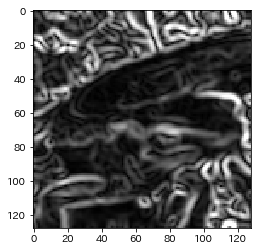

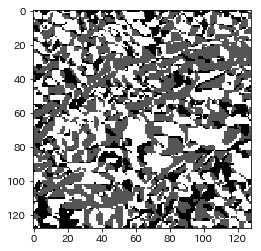

In [76]:
def Canny_step1(img):
    def BGR2GRAY(img):
        b = img[:, :, 0].copy()
        g = img[:, :, 1].copy()
        r = img[:, :, 2].copy()
        
        out = 0.2126 * r + 0.7152 * g + 0.0722 * b

        return out
    
    def gaussian_filter(img, K_size=3, sigma=1.3):
        H, W = img.shape
        
        #padding
        pad = K_size // 2
        out = np.pad(img, (pad, pad), 'edge')
        
        #create filter
        kernel = np.zeros((K_size, K_size), dtype=np.float)
        y = np.arange(-pad, -pad+K_size).repeat(K_size).reshape(K_size, -1)
        x = np.tile(np.arange(-pad, -pad+K_size), (K_size, 1))
        kernel = np.exp(-(x**2 + y**2) / (2 * (sigma *2))) / (sigma * np.sqrt(2 * np.pi))
        kernel /= kernel.sum()
        
        #filtering
        tmp = out.copy()
        for y in range(H):
            for x in range(W):
                out[pad+y, pad+x] = np.sum(kernel * tmp[y:y+K_size, x:x+K_size])
        
        out = out[pad:H+pad, pad:W+pad]
        
        return out
    
    def sobel_filter(img, K_size=3):
        H, W = img.shape

        # padding
        pad = K_size // 2
        out = np.pad(img, (pad, pad), 'edge')
        
        tmp = out.copy()
        
        out_v = out.copy()
        out_h = out.copy()
        
        ## Sobel vertical
        Kv = [[1., 2., 1.],[0., 0., 0.], [-1., -2., -1.]]
        ## Sobel horizontal
        Kh = [[1., 0., -1.],[2., 0., -2.],[1., 0., -1.]]

        # filtering
        for y in range(H):
            for x in range(W):
                out_v[pad + y, pad + x] = np.sum(Kv * (tmp[y: y + K_size, x: x + K_size]))
                out_h[pad + y, pad + x] = np.sum(Kh * (tmp[y: y + K_size, x: x + K_size]))

        out_v = out_v[pad: pad + H, pad: pad + W]
        out_h = out_h[pad: pad + H, pad: pad + W]
        
        return out_v, out_h
    
    def get_edge_tan(fx, fy):
        edge = np.sqrt(fx**2 + fy**2)
        fx[fx==0] = 1e-5
        
        tan = np.arctan(fy / fx)
        
        edge = np.clip(edge, 0, 255).astype(np.uint8)
        
        return edge, tan
    
    def angle_quantization(tan):
        angle = np.zeros_like(tan, dtype=np.uint8)
        angle[np.where((tan > -0.4142) & (tan <= 0.4142))] = 0
        angle[np.where((tan > 0.4142) & (tan < 2.4142))] = 45
        angle[np.where((tan >= 2.4142) | (tan <= -2.4142))] = 95
        angle[np.where((tan > -2.4142) & (tan <= -0.4142))] = 135
        
        return angle
    
    gray = BGR2GRAY(img)
    
    gaussian = gaussian_filter(gray, K_size=5, sigma=1.4)
    
    fy, fx = sobel_filter(gaussian)
    
    edge, tan = get_edge_tan(fx, fy)
    
    angle = angle_quantization(tan)
    
    return edge, angle

img = cv2.imread("imori.jpg").astype(np.float32)
edge , angle = Canny_step1(img)

plt.figure()
plt.imshow(edge, cmap="gray")
plt.figure()
plt.imshow(angle, cmap="gray")

cv2.imwrite("answers/answer41_1.jpg", edge)
cv2.imwrite("answers/answer41_2.jpg", angle)

# Q.42. Cannyエッジ検出 (Step.2) 細線化

True

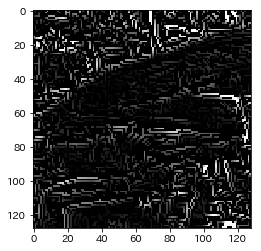

In [77]:
def Canny_step2(img):
    def BGR2GRAY(img):
        b = img[:, :, 0].copy()
        g = img[:, :, 1].copy()
        r = img[:, :, 2].copy()
        
        out = 0.2126 * r + 0.7152 * g + 0.0722 * b

        return out
    
    def gaussian_filter(img, K_size=3, sigma=1.3):
        H, W = img.shape
        
        #padding
        pad = K_size // 2
        out = np.pad(img, (pad, pad), 'edge')
        
        #create filter
        kernel = np.zeros((K_size, K_size), dtype=np.float)
        y = np.arange(-pad, -pad+K_size).repeat(K_size).reshape(K_size, -1)
        x = np.tile(np.arange(-pad, -pad+K_size), (K_size, 1))
        kernel = np.exp(-(x**2 + y**2) / (2 * (sigma *2))) / (sigma * np.sqrt(2 * np.pi))
        kernel /= kernel.sum()
        
        #filtering
        tmp = out.copy()
        for y in range(H):
            for x in range(W):
                out[pad+y, pad+x] = np.sum(kernel * tmp[y:y+K_size, x:x+K_size])
        
        out = out[pad:H+pad, pad:W+pad]
        
        return out
    
    def sobel_filter(img, K_size=3):
        H, W = img.shape

        # padding
        pad = K_size // 2
        out = np.pad(img, (pad, pad), 'edge')
        
        tmp = out.copy()
        
        out_v = out.copy()
        out_h = out.copy()
        
        ## Sobel vertical
        Kv = [[1., 2., 1.],[0., 0., 0.], [-1., -2., -1.]]
        ## Sobel horizontal
        Kh = [[1., 0., -1.],[2., 0., -2.],[1., 0., -1.]]

        # filtering
        for y in range(H):
            for x in range(W):
                out_v[pad + y, pad + x] = np.sum(Kv * (tmp[y: y + K_size, x: x + K_size]))
                out_h[pad + y, pad + x] = np.sum(Kh * (tmp[y: y + K_size, x: x + K_size]))

        out_v = out_v[pad: pad + H, pad: pad + W]
        out_h = out_h[pad: pad + H, pad: pad + W]
        
        return out_v, out_h
    
    def get_edge_tan(fx, fy):
        edge = np.sqrt(fx**2 + fy**2)
        fx[fx==0] = 1e-5
        
        tan = np.arctan(fy / fx)
        
        edge = np.clip(edge, 0, 255).astype(np.uint8)
        
        return edge, tan
    
    def angle_quantization(tan):
        angle = np.zeros_like(tan, dtype=np.uint8)
        angle[np.where((tan > -0.4142) & (tan <= 0.4142))] = 0
        angle[np.where((tan > 0.4142) & (tan < 2.4142))] = 45
        angle[np.where((tan >= 2.4142) | (tan <= -2.4142))] = 95
        angle[np.where((tan > -2.4142) & (tan <= -0.4142))] = 135
        
        return angle
    
    def non_maximum_suppression(angle, edge):
        H, W = angle.shape
        
        for y in range(H):
            for x in range(W):
                if angle[y, x] == 0:
                    dx1, dy1, dx2, dy2 = -1, 0, 1, 0
                elif angle[y, x] == 45:
                    dx1, dy1, dx2, dy2 = -1, 1, 1, -1
                elif angle[y, x] == 90:
                    dx1, dy1, dx2, dy2 = 0, -1, 0, 1
                elif angle[y, x] == 135:
                    dx1, dy1, dx2, dy2 = -1, -1, 1, 1
                if x == 0:
                    dx1 = max(dx1, 0)
                    dx2 = max(dx2, 0)
                if x == W-1:
                    dx1 = min(dx1, 0)
                    dx2 = min(dx2, 0)
                if y == 0:
                    dy1 = max(dy1, 0)
                    dy2 = max(dy2, 0)
                if y == H-1:
                    dy1 = min(dy1, 0)
                    dy2 = min(dy2, 0)
                if max(max(edge[y, x], edge[y+dy1, x+dx1]), edge[y+dy2, x+dx2]) != edge[y, x]:
                    edge[y, x] = 0
                
        return edge
    
    gray = BGR2GRAY(img)
    
    gaussian = gaussian_filter(gray, K_size=5, sigma=1.4)
    
    fy, fx = sobel_filter(gaussian)
    
    edge, tan = get_edge_tan(fx, fy)
    
    angle = angle_quantization(tan)
    
    edge = non_maximum_suppression(angle, edge)
    
    return edge

img = cv2.imread("imori.jpg").astype(np.float32)
edge = Canny_step2(img)

plt.figure()
plt.imshow(edge, cmap="gray")

cv2.imwrite("answers/answer42.jpg", edge)

# Q.43. Cannyエッジ検出 (Step.3) ヒステリシス閾処理

True

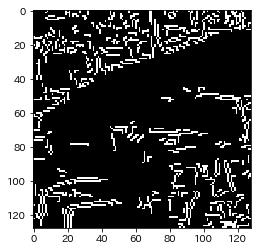

In [78]:
def Canny(img):
    def BGR2GRAY(img):
        b = img[:, :, 0].copy()
        g = img[:, :, 1].copy()
        r = img[:, :, 2].copy()
        
        out = 0.2126 * r + 0.7152 * g + 0.0722 * b

        return out
    
    def gaussian_filter(img, K_size=3, sigma=1.3):
        H, W = img.shape
        
        #padding
        pad = K_size // 2
        out = np.pad(img, (pad, pad), 'edge')
        
        #create filter
        kernel = np.zeros((K_size, K_size), dtype=np.float)
        y = np.arange(-pad, -pad+K_size).repeat(K_size).reshape(K_size, -1)
        x = np.tile(np.arange(-pad, -pad+K_size), (K_size, 1))
        kernel = np.exp(-(x**2 + y**2) / (2 * (sigma *2))) / (sigma * np.sqrt(2 * np.pi))
        kernel /= kernel.sum()
        
        #filtering
        tmp = out.copy()
        for y in range(H):
            for x in range(W):
                out[pad+y, pad+x] = np.sum(kernel * tmp[y:y+K_size, x:x+K_size])
        
        out = out[pad:H+pad, pad:W+pad]
        
        return out
    
    def sobel_filter(img, K_size=3):
        H, W = img.shape

        # padding
        pad = K_size // 2
        out = np.pad(img, (pad, pad), 'edge')
        
        tmp = out.copy()
        
        out_v = out.copy()
        out_h = out.copy()
        
        ## Sobel vertical
        Kv = [[1., 2., 1.],[0., 0., 0.], [-1., -2., -1.]]
        ## Sobel horizontal
        Kh = [[1., 0., -1.],[2., 0., -2.],[1., 0., -1.]]

        # filtering
        for y in range(H):
            for x in range(W):
                out_v[pad + y, pad + x] = np.sum(Kv * (tmp[y: y + K_size, x: x + K_size]))
                out_h[pad + y, pad + x] = np.sum(Kh * (tmp[y: y + K_size, x: x + K_size]))

        out_v = out_v[pad: pad + H, pad: pad + W]
        out_h = out_h[pad: pad + H, pad: pad + W]
        
        return out_v, out_h
    
    def get_edge_tan(fx, fy):
        edge = np.sqrt(fx**2 + fy**2)
        fx[fx==0] = 1e-5
        
        tan = np.arctan(fy / fx)
        
        edge = np.clip(edge, 0, 255)
        
        return edge, tan
    
    def angle_quantization(tan):
        angle = np.zeros_like(tan, dtype=np.uint8)
        angle[np.where((tan > -0.4142) & (tan <= 0.4142))] = 0
        angle[np.where((tan > 0.4142) & (tan < 2.4142))] = 45
        angle[np.where((tan >= 2.4142) | (tan <= -2.4142))] = 95
        angle[np.where((tan > -2.4142) & (tan <= -0.4142))] = 135
        
        return angle
    
    def non_maximum_suppression(angle, edge):
        H, W = angle.shape
        
        for y in range(H):
            for x in range(W):
                if angle[y, x] == 0:
                    dx1, dy1, dx2, dy2 = -1, 0, 1, 0
                elif angle[y, x] == 45:
                    dx1, dy1, dx2, dy2 = -1, 1, 1, -1
                elif angle[y, x] == 90:
                    dx1, dy1, dx2, dy2 = 0, -1, 0, 1
                elif angle[y, x] == 135:
                    dx1, dy1, dx2, dy2 = -1, -1, 1, 1
                if x == 0:
                    dx1 = max(dx1, 0)
                    dx2 = max(dx2, 0)
                if x == W-1:
                    dx1 = min(dx1, 0)
                    dx2 = min(dx2, 0)
                if y == 0:
                    dy1 = max(dy1, 0)
                    dy2 = max(dy2, 0)
                if y == H-1:
                    dy1 = min(dy1, 0)
                    dy2 = min(dy2, 0)
                if max(max(edge[y, x], edge[y+dy1, x+dx1]), edge[y+dy2, x+dx2]) != edge[y, x]:
                    edge[y, x] = 0
                
        return edge
    
    def hysterisis(edge, HT=100, LT=30):
        H, W = edge.shape

        edge[edge > HT] = 255
        edge[edge < LT] = 0

        _edge = np.zeros((H+2, W+2), dtype=np.float32)
        _edge[1:H+1, 1:W+1] = edge

        nn = np.array(((1., 1., 1.), (1., 0., 1.), (1., 1., 1.)), dtype=np.float32)

        for y in range(1, H+2):
                for x in range(1, W+2):
                        if _edge[y, x] <= LT or _edge[y, x] >= HT:
                                continue
                        if np.max(_edge[y-1:y+2, x-1:x+2] * nn) >= HT:
                                _edge[y, x] = 255
                        else:
                                _edge[y, x] = 0
                                
        edge = _edge[1:H+1, 1:W+1]
                                
        return edge
    
    gray = BGR2GRAY(img)
    
    gaussian = gaussian_filter(gray, K_size=5, sigma=1.4)
    
    fy, fx = sobel_filter(gaussian)
    
    edge, tan = get_edge_tan(fx, fy)
    
    angle = angle_quantization(tan)
    
    edge = non_maximum_suppression(angle, edge)
    
    edge = hysterisis(edge)
    
    return edge

img = cv2.imread("imori.jpg").astype(np.float32)
edge = Canny(img)

plt.figure()
plt.imshow(edge, cmap="gray")

cv2.imwrite("answers/answer43.jpg", edge)

# Q.44. Hough変換・直線検出 (Step.1) Hough変換

True

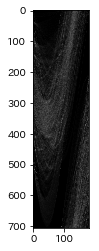

In [79]:
def Hough_step1(edge):
    def voting(edge):
        H, W = edge.shape
        
        rho_max = np.ceil(np.sqrt(H ** 2 + W ** 2)).astype(np.int)
        
        hough = np.zeros((rho_max, 180), dtype=np.int)
        
        ind = np.where(edge==255)
        
        for y, x in zip(ind[0], ind[1]):
            for t in range(0, 180):
                theta = np.pi / 180 * t
                rho = int(x*np.cos(theta) + y*np.sin(theta))
                hough[rho, t] += 1
        
        out = hough.astype(np.uint8)
        
        return out
    
    out = voting(edge)
    
    return out

img = cv2.imread("art2.jpg").astype(np.float32)

edge = Canny(img)
out = Hough_step1(edge)

plt.figure()
plt.imshow(out, cmap="gray")

cv2.imwrite("answers/answer44.jpg", out)

# Hough変換・直線検出 (Step.2) NMS

True

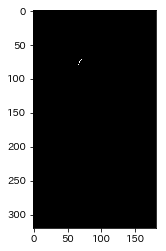

In [91]:
def Hough_step2(edge, img):
    def voting(edge):
        H, W = edge.shape
        
        rho_max = np.ceil(np.sqrt(H ** 2 + W ** 2)).astype(np.int)
        
        hough = np.zeros((rho_max, 180), dtype=np.int)
        
        ind = np.where(edge==255)
        
        for y, x in zip(ind[0], ind[1]):
            for t in range(0, 180):
                theta = np.pi / 180 * t
                rho = int(x*np.cos(theta) + y*np.sin(theta))
                hough[rho, t] += 1
        
        out = hough.astype(np.uint8)
        
        return out
    
    def non_maximum_suppression(hough):
        rho_max, _ = hough.shape
        
        for y in range(rho_max):
            for x in range(180):
                x1 = max(x-1, 0)
                x2 = min(x+2, 180)
                y1 = max(y-1, 0)
                y2 = min(y+2, rho_max)
                if np.max(hough[y1:y2, x1:x2] == hough[y, x]):
                    pass
                else:
                    hough[y, x] = 0
        
        ind_x = np.argsort(hough.ravel())[::-1][:10]
        ind_y = ind_x.copy()
        thetas = ind_x % 180
        rhos = ind_y // 180
        out = np.zeros_like(hough, dtype=np.uint8)
        out[rhos, thetas] = 255
        
        return out
    
    hough = voting(edge)
    
    out = non_maximum_suppression(hough)
    
    return out

img = cv2.imread("thorino.jpg").astype(np.float32)
edge = Canny(img)
out = Hough_step2(edge, img)

plt.figure()
plt.imshow(out, cmap="gray")

cv2.imwrite("answers/answer45.jpg", out)

# Q.46. Hough変換・直線検出 (Step.3) Hough逆変換

True

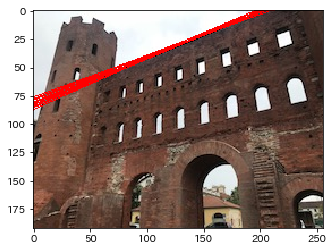

In [87]:
def Hough(edge, img):
    def voting(edge):
        H, W = edge.shape
        
        rho_max = np.ceil(np.sqrt(H ** 2 + W ** 2)).astype(np.int)
        
        hough = np.zeros((rho_max, 180), dtype=np.int)
        
        ind = np.where(edge==255)
        
        for y, x in zip(ind[0], ind[1]):
            for t in range(0, 180):
                theta = np.pi / 180 * t
                rho = int(x*np.cos(theta) + y*np.sin(theta))
                hough[rho, t] += 1
        
        out = hough.astype(np.uint8)
        
        return out
    
    def non_maximum_suppression(hough):
        rho_max, _ = hough.shape
        
        for y in range(rho_max):
            for x in range(180):
                x1 = max(x-1, 0)
                x2 = min(x+2, 180)
                y1 = max(y-1, 0)
                y2 = min(y+2, rho_max)
                if np.max(hough[y1:y2, x1:x2] == hough[y, x]):
                    pass
                else:
                    hough[y, x] = 0
        
        ind_x = np.argsort(hough.ravel())[::-1][:10]
        ind_y = ind_x.copy()
        thetas = ind_x % 180
        rhos = ind_y // 180
        out = np.zeros_like(hough, dtype=np.uint8)
        out[rhos, thetas] = 255
        
        return out
    
    def inverse_hough(hough, img):
        H, W, _ = img.shape

        out = img.copy()

        ind_x = np.argsort(hough.ravel())[::-1][:10]
        ind_y = ind_x.copy()
        thetas = ind_x % 180
        rhos = ind_y // 180

        for theta, rho in zip(thetas, rhos):
            t = np.pi / 180. * theta

            # hough -> (x,y)
            for x in range(W):
                if np.sin(t) != 0:
                    y = - (np.cos(t) / np.sin(t)) * x + rho / np.sin(t)
                    y = int(y)
                    if y >= H or y < 0:
                        continue
                    out[y, x] = [0, 0, 255]
            for y in range(H):
                if np.cos(t) != 0:
                    x = - (np.sin(t) / np.cos(t)) * y + rho / np.cos(t)
                    x = int(x)
                if x >= W or x < 0:
                    continue
                out[y, x] = [0, 0, 255]
                    
        out = out.astype(np.uint8)

        return out
    
    hough = voting(edge)
    
    hough = non_maximum_suppression(hough)
    
    out = inverse_hough(hough, img)
    
    return out

img = cv2.imread("thorino.jpg").astype(np.float32)
edge = Canny(img)
out = Hough(edge, img)

plt.figure()
plt.imshow(BGR2RGB(out))

cv2.imwrite("answers/answer46.jpg", out)

# Q.47 モルフォロジー処理(膨張)

threshold =  127


True

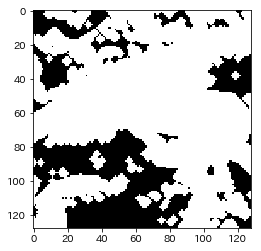

In [82]:
def RGB2GRAY(img):
    #色取り出し
    red = img[:, :, 2].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 0].copy()
    
    img = 0.2126*red + 0.7152*green + 0.0722*blue
    img = img.astype(np.uint8)
    
    return img

def otsu_binarization(img):
    max_Sb = 0
    max_t = 0
    
    img = RGB2GRAY(img)
    
    height = img.shape[0]
    width = img.shape[1]
    
    for th in range(1, 255):
        cls0 = img[img < th]
        cls1 = img[img >= th]
        
        w0 = len(cls0) / (height * width)
        w1 = len(cls1) / (height * width)
        
        M0  = np.mean(cls0) if len(cls0) > 0 else 0
        M1 = np.mean(cls1) if len(cls1) > 0 else 0
        
        Sb = w0 * w1 * (M0 - M1)**2
        
        if max_Sb < Sb:
            max_Sb = Sb
            max_t = th
            
    #閾値処理
    print("threshold = ", max_t)
    img = np.where(img < max_t, 0, 255)
    
    return img

def dilate(img, time=1):
    H, W = img.shape
    
    kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=np.int)
    
    out = img.copy()
    for i in range(time):
        tmp = np.pad(out, (1, 1), 'edge')
        for y in range(1, 1+H):
            for x in range(1, 1+W):
                if np.sum(kernel * tmp[y-1:y+2, x-1:x+2] >= 255):
                    out[y-1, x-1] = 255
    
    return out

img = cv2.imread("imori.jpg").astype(np.float32)

otsu = otsu_binarization(img)

out = dilate(otsu, time=2)

plt.figure()
plt.imshow(out, cmap="gray")

cv2.imwrite("answers/answer47.jpg", out)

threshold =  127


True

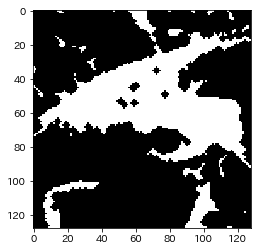

In [83]:
def RGB2GRAY(img):
    #色取り出し
    red = img[:, :, 2].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 0].copy()
    
    img = 0.2126*red + 0.7152*green + 0.0722*blue
    img = img.astype(np.uint8)
    
    return img

def otsu_binarization(img):
    max_Sb = 0
    max_t = 0
    
    img = RGB2GRAY(img)
    
    height = img.shape[0]
    width = img.shape[1]
    
    for th in range(1, 255):
        cls0 = img[img < th]
        cls1 = img[img >= th]
        
        w0 = len(cls0) / (height * width)
        w1 = len(cls1) / (height * width)
        
        M0  = np.mean(cls0) if len(cls0) > 0 else 0
        M1 = np.mean(cls1) if len(cls1) > 0 else 0
        
        Sb = w0 * w1 * (M0 - M1)**2
        
        if max_Sb < Sb:
            max_Sb = Sb
            max_t = th
            
    #閾値処理
    print("threshold = ", max_t)
    img = np.where(img < max_t, 0, 255)
    
    return img

def erode(img, time=1):
    H, W = img.shape
    
    kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=np.int)
    
    out = img.copy()
    for i in range(time):
        tmp = np.pad(out, (1, 1), 'edge')
        for y in range(1, 1+H):
            for x in range(1, 1+W):
                if np.sum(kernel * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                    out[y-1, x-1] = 0
    
    return out

img = cv2.imread("imori.jpg").astype(np.float32)

otsu = otsu_binarization(img)

out = erode(otsu, time=2)

plt.figure()
plt.imshow(out, cmap="gray")

cv2.imwrite("answers/answer48.jpg", out)

# Q.49. オープニング処理

threshold =  127


True

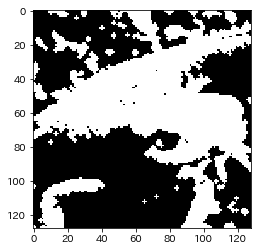

In [84]:
img = cv2.imread("imori.jpg").astype(np.float32)

otsu = otsu_binarization(img)

N = 1
out = erode(otsu, time=N)
out = dilate(out, time=N)

plt.figure()
plt.imshow(out, cmap="gray")

cv2.imwrite("answers/answer49.jpg", out)

# Q.50. クロージング処理

True

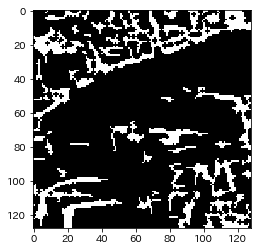

In [85]:
img = cv2.imread("imori.jpg").astype(np.float32)

edge = Canny(img)

N = 1
out = dilate(edge, time=N)
out = erode(out, time=N)

plt.figure()
plt.imshow(out, cmap="gray")

cv2.imwrite("answers/answer50.jpg", out)